## M-Block Swing Around

In [63]:
import math
import numpy as np
import time, random
import matplotlib.pyplot as plt
%matplotlib inline
from IPython.display import HTML
from pydrake.math import sin, cos
from pydrake.all import *
from underactuated import (FindResource, PlanarRigidBodyVisualizer)

In [64]:
%reload_ext autoreload
%autoreload 2
from dynamics_nd import *
from visualizer import *
from optimization import *
from plotting import *

In [65]:
vis = MeshcatCubeVisualizer()
vis.draw_mblock()

You can open the visualizer by visiting the following URL:
http://127.0.0.1:7002/static/


In [66]:
dim = 2

In [76]:
x = 0.0; y = 0.0; theta = 0.;
initial_state = get_nd_state((x,y,theta,0,0,0,0,0), dim)
vis.draw_transformation(initial_state, dim)

In [77]:
x = 1.0; y = 1.0; theta = -2*np.pi/2.0;
final_state = get_nd_state((x,y,theta,0,0,0,0,0), dim)
vis.draw_transformation(final_state, dim)

In [69]:
min_time = 0.5; max_time = 15.; max_torque = 1000.0

In [70]:
# no cost, just constraints
traj, input_traj, force_traj, time_array = mblock_example(initial_state, final_state, \
                                                         min_time, max_time, \
                                                         max_torque, dim)

Initial State: (0.0, 0.0, 0.0, 0, 0, 0, 0, 0)
Final State: (1.0, 1.0, -3.141592653589793, 0, 0, 0, 0, 0)
Number of decision vars 859
SolutionResult.kUnknownError


In [59]:
# linear interpolation
steps_per_sec = 60
sec = time_array[-1]
num_steps = sec*steps_per_sec
x_interp = np.linspace(0,sec,num_steps)

interp_traj = np.empty((len(x_interp), len(traj[0])))
for i in range(len(traj[0])):
    interp_traj[:,i] = np.interp(x_interp, time_array, traj[:,i])

/usr/local/lib/python2.7/site-packages/ipykernel_launcher.py:5: DeprecationWarning: object of type <type 'numpy.float64'> cannot be safely interpreted as an integer.
  """


In [60]:
# trajectory found, but remove the aliasing
print("Time of block jump: {} sec".format(time_array[-1]))
dt = x_interp[1] - x_interp[0]
for i in range(len(interp_traj)):
    vis.draw_transformation(interp_traj[i,:],dimension)
    time.sleep(dt)

Time of swing up: 5.80784919763 sec


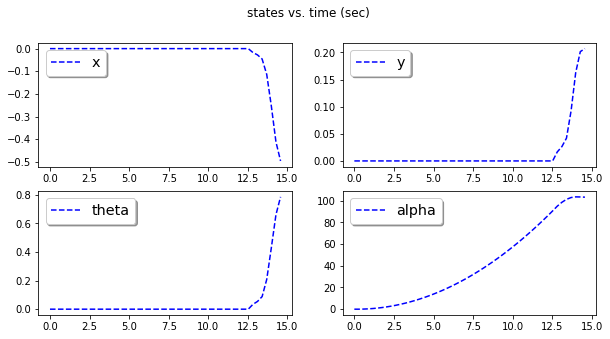

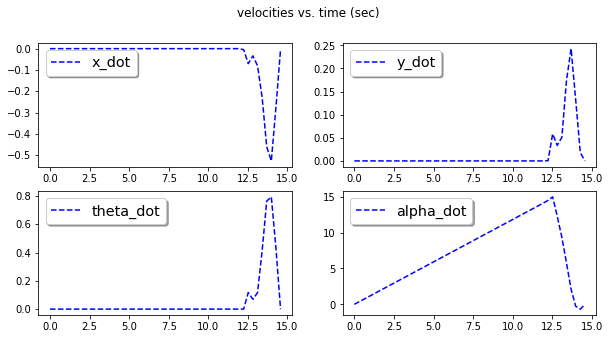

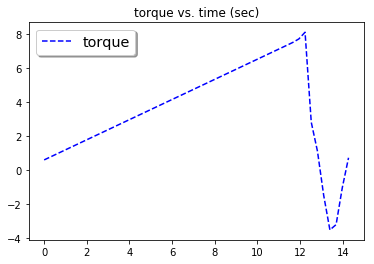

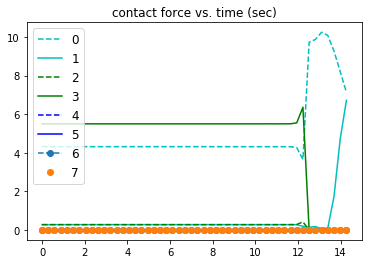

In [9]:
plot_states(traj, time_array, dimension)
plot_vels(traj, time_array, dimension)
input_plot(input_traj, time_array, dimension)
ground_force_plot(force_traj, time_array, dimension)